In [195]:
import cv2
import pandas as pd
import numpy as np
import numpy as np
lyt = f'Z:/Gaochao/WBI/zexi/1219/1219-06/calcium_intensity.npy'
calcium_intensity= np.load(lyt)
save_p = lyt.split('calcium_intensity.npy')[0]
print(save_p)
print(calcium_intensity.shape)

Z:/Gaochao/WBI/zexi/1219/1219-06/
(89, 1464)


In [196]:
# 预处理
scale = 1.5
for i in range(calcium_intensity.shape[0]):
    calcium_intensity[i] = (cv2.blur(calcium_intensity[i], (1, 7))*scale)[:,0]

In [75]:
# 导入分析后的行为数据
beh_label = r'Z:\data space+\C. elegans chemotaxis\20241223_WBI\121905_position_als.csv'
df_pos_als = pd.read_csv(beh_label)

In [76]:
# 导入神经数据时间戳
neuron_time_label = r'Z:\data space+\C. elegans chemotaxis\20241223_WBI\20241219-5_volume_timestamp.csv'
df_n_t = pd.read_csv(neuron_time_label)

In [197]:
# PCA
cov = np.cov(calcium_intensity)
ev,evec = np.linalg.eig(cov)
sort_idx=np.argsort(ev)[::-1]
ev=ev[sort_idx]
evec=evec[:,sort_idx]
expr = np.sum(ev[:2])/np.sum(ev)
xn= calcium_intensity.T @ evec.real

In [198]:
# 创建列名
column_names = [f"PC{i+1}" for i in range(xn.shape[1])]
# 转为 DataFrame
df_n_06 = pd.DataFrame(xn, columns=column_names)

In [80]:
df_n['Vol_time'] = df_n_t.Vol_time

In [81]:
df_nt = df_n.copy()
df_pos = df_pos_als.copy()
# 查找最近值和索引
nearest_times = []
nearest_indices = []

for vol_time in df_nt['Vol_time']:
    # 计算时间差的绝对值
    differences = np.abs(df_pos['Time'] - vol_time)
    # 找到最小差值的索引
    nearest_idx = np.argmin(differences)
    # 保存最近时间值和索引
    nearest_times.append(df_pos.loc[nearest_idx, 'Time'])
    nearest_indices.append(nearest_idx)

# 将结果存入 DataFrame
df_nt['Nearest_Time'] = nearest_times
df_nt['Nearest_Index'] = nearest_indices

In [82]:
df_nt

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     5.939418 -0.035519 -0.564486 -0.473221  0.363617  0.630332 -0.363345   
1     5.933837 -0.014545 -0.530601 -0.404107  0.420933  0.641301 -0.334172   
2     5.842793  0.062948 -0.570281 -0.399030  0.427244  0.668565 -0.337127   
3     5.789826  0.068692 -0.600608 -0.462436  0.563129  0.712185 -0.395011   
4     5.843600  0.090645 -0.583706 -0.475644  0.507922  0.597416 -0.390470   
...        ...       ...       ...       ...       ...       ...       ...   
3996  0.869272  0.160286 -1.038718 -0.110340  0.137755 -0.234726  0.209921   
3997  0.747062  0.144943 -0.927591 -0.108615  0.171046 -0.301219  0.133140   
3998  0.645355  0.087816 -0.894463 -0.148163  0.186818 -0.375299  0.116372   
3999  0.627416  0.089126 -0.965273 -0.138964  0.142715 -0.286364  0.136042   
4000  0.656451  0.050333 -0.982328 -0.082628  0.121406 -0.233949  0.195623   

           PC8       PC9      PC10  ...     PC109     PC110     PC111  \
0     0.251058 -0.215562 -0.561879  ... -0.023559 -0.030998  0.006431   
1     0.241630 -0.272926 -0.571897  ...  0.009683 -0.054063 -0.013421   
2     0.211262 -0.291213 -0.525821  ... -0.023081 -0.061437 -0.004629   
3     0.159058 -0.313171 -0.590381  ... -0.017771 -0.071830  0.049744   
4     0.121275 -0.261674 -0.556108  ... -0.052685 -0.029303  0.016339   
...        ...       ...       ...  ...       ...       ...       ...   
3996  0.107597  0.035314  0.205383  ... -0.056952 -0.024629 -0.022349   
3997  0.181843  0.042151  0.188882  ... -0.036576 -0.034992  0.002775   
3998  0.145995  0.118496  0.141504  ... -0.012294 -0.052443  0.015587   
3999  0.157448  0.219633  0.116876  ... -0.008526 -0.067145  0.003226   
4000  0.108566  0.266482  0.113821  ...  0.000499 -0.056036 -0.007404   

         PC112     PC113     PC114     PC115  Vol_time  Nearest_Time  \
0    -0.001469  0.007334  0.048632  0.039176    71.807        71.817   
1    -0.019538  0.003547  0.047161  0.023098    72.107        72.111   
2     0.010719  0.038873  0.037881  0.000554    72.407        72.405   
3     0.029935  0.049439  0.041301 -0.008441    72.711        72.701   
4     0.058663  0.030356  0.008591  0.009183    73.010        73.021   
...        ...       ...       ...       ...       ...           ...   
3996  0.003495  0.064994 -0.002781  0.002736  1270.636      1270.641   
3997  0.009030  0.052313  0.002498  0.012962  1270.935      1270.935   
3998 -0.007869  0.048592 -0.002038  0.018672  1271.234      1271.229   
3999 -0.031467  0.054944  0.005378  0.019513  1271.533      1271.523   
4000 -0.020016  0.061729  0.026651  0.022512  1271.833      1271.843   

      Nearest_Index  
0                 1  
1                12  
2                23  
3                34  
4                46  
...             ...  
3996          44842  
3997          44853  
3998          44864  
3999          44875  
4000          44887  

[4001 rows x 118 columns]

In [83]:
# 从df_pos中赋值列到df_nt

columns_to_add = ['X', 'Y', 'speed', 'agl_speed', 'CTX_left', 'Event', 'Reorientation']
for col in columns_to_add:
    df_nt[col] = df_nt['Nearest_Index'].map(df_pos_als[col])

In [99]:
# 重置X轴坐标值
df_nt_mx = df_nt.copy()
df_nt_mx['X'] = df_nt['X']-df_nt['X'].min()

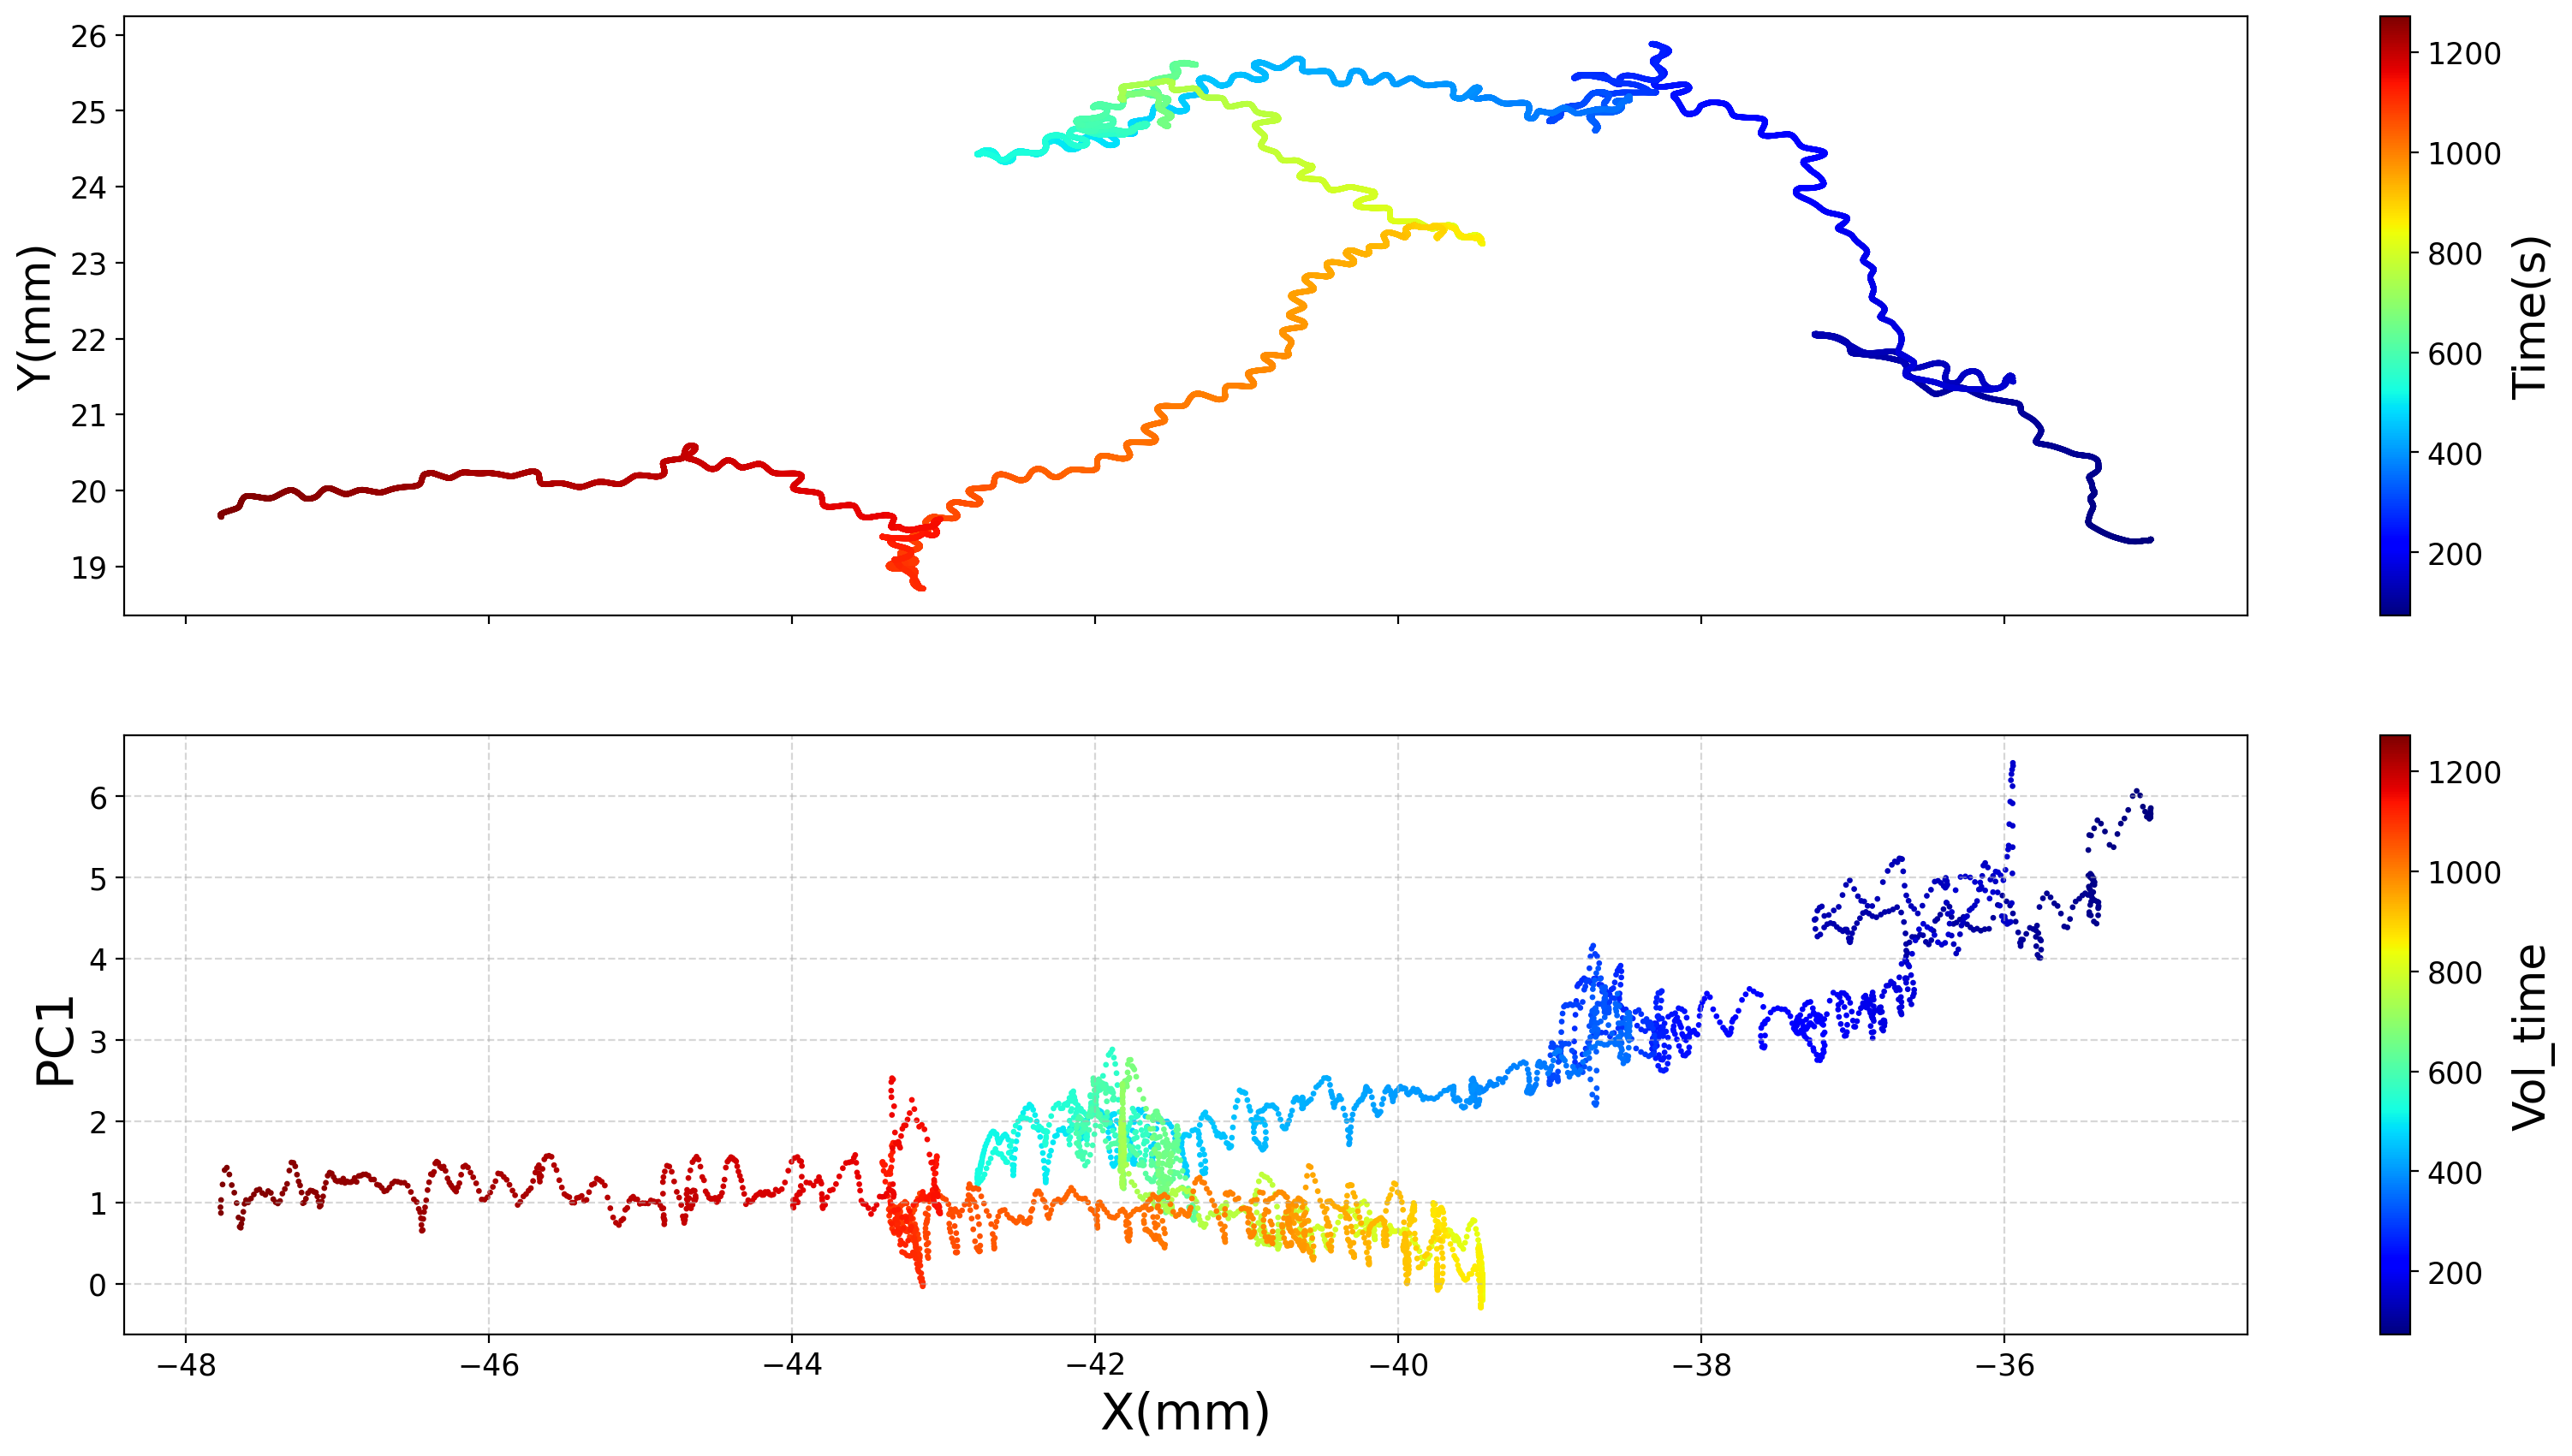

In [218]:
import matplotlib.colors as mcolors
# PC可视化
nt_col = 'PC1'
x_col = 'X'
color_col = 'Vol_time'
x_label = x_col
fs = 25

fig,ax = plt.subplots(2,1, figsize=(20, 10), dpi=200, sharex = True)

# 轨迹可视化
scatter1 = ax[0].scatter(df_pos_als['X'], df_pos_als['Y'], c = df_pos_als.Time, cmap = 'jet', s = 2)
bar = plt.colorbar(scatter1, ax=ax[0])  # 添加 colorbar 和标签
bar.ax.tick_params(labelsize=fs*0.5)
bar.set_label(label='Time(s)', fontsize=fs*0.75)
ax[0].tick_params(labelsize=fs*0.5)
# ax[0].set_xlabel('X(mm)', fontsize=fs*0.75)
ax[0].set_ylabel('Y(mm)', fontsize=fs*0.75)
# ax[0].set_aspect(1)
# 流形可视化
scatter = ax[1].scatter(df_nt[x_col], df_nt[nt_col],c=df_nt[color_col],cmap='jet', s=2)
bar = plt.colorbar(scatter, ax=ax[1])  # 添加 colorbar 和标签
bar.ax.tick_params(labelsize=fs*0.5)
bar.set_label(label=color_col, fontsize=fs*0.75)
# plt.title(f'{nt_col} over {x_col}', fontsize=fs, pad = 20)
ax[1].tick_params(labelsize=fs*0.5)
ax[1].set_xlabel(x_col+'(mm)', fontsize=fs*0.85)
ax[1].set_ylabel(nt_col, fontsize=fs*0.85)
ax[1].grid(True, linestyle='dashed', alpha=0.5)
plt.show()

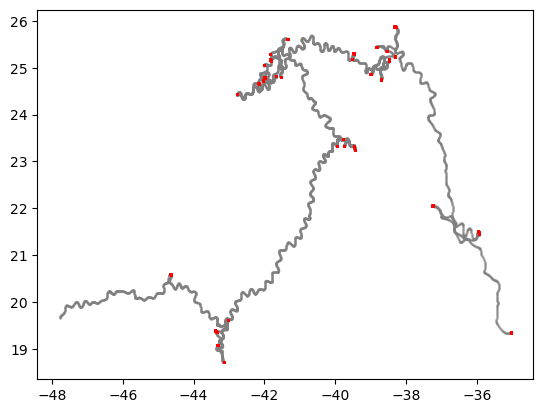

In [224]:
plt.scatter(df_pos_als['X'], df_pos_als['Y'],s=0.8, c='grey', alpha=0.05)
df_pos_t = df_pos_als[df_pos_als.Reorientation==1]
plt.scatter(df_pos_t['X'], df_pos_t['Y'],s=1, c='r')
plt.show()

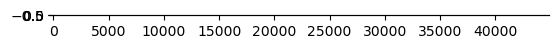

In [246]:
# plt.figure(figsize = (20,6))
# plt.plot(df_pos_als.Time, df_pos_als.Reorientation)
data = df_pos_als.Reorientation.values
data_mat = data[np.newaxis, :]
plt.imshow(data_mat, cmap='hot')

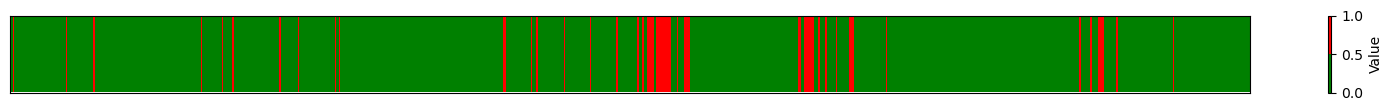

In [267]:
from matplotlib.colors import ListedColormap

# 示例一维向量
vector = df_nt.Reorientation.values

# 将一维向量扩展为二维（例如 1 行或 1 列）
heatmap_data = vector[np.newaxis, :]  # 变为 1 行 N 列


# Define two colors
colors = ['green', 'red']

# Create a ListedColormap
two_color_cmap = ListedColormap(colors)

# 绘制热图
plt.figure(figsize=(20, 1))  # 设置热图大小
plt.imshow(heatmap_data, cmap=two_color_cmap, aspect='auto')  # 选择 colormap
plt.colorbar(label='Value')  # 添加颜色条
plt.xticks([])  # 设置x轴刻度
plt.yticks([])  # 隐藏y轴刻度
# plt.title("Heatmap of 1D Vector")
plt.show()

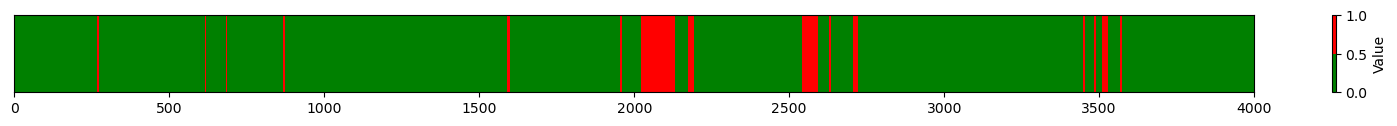

In [296]:
from scipy.ndimage import grey_opening,grey_closing

# Define the size of the structuring element
structure_size = 5

# Perform opening
opened_vector = grey_opening(heatmap_data, size=structure_size)

structure_size = 13
# Perform closing
opened_vector = grey_closing(opened_vector, size=structure_size)

plt.figure(figsize=(20, 1))  # 设置热图大小
plt.imshow(opened_vector, cmap=two_color_cmap, aspect='auto')  # 选择 colormap
plt.colorbar(label='Value')  # 添加颜色条
plt.xticks()  # 设置x轴刻度
plt.yticks([])  # 隐藏y轴刻度
# plt.title("Heatmap of 1D Vector")
plt.show()

In [286]:
first_indices

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [289]:
import numpy as np
from scipy.ndimage import label

# Example binary vector
vector = opened_vector

start_indices = np.where(np.diff(np.insert(vector, 0, 0)) == 1)[0]
end_indices = np.where(np.diff(np.append(vector, 0)) == -1)[0]

In [290]:
start_indices

array([ 267,  615,  682,  868, 1591, 1955, 2020, 2173, 2542, 2627, 2706,
       3446, 3481, 3508, 3567], dtype=int64)

In [291]:
end_indices

array([ 272,  619,  686,  872, 1599, 1959, 2129, 2192, 2590, 2632, 2721,
       3452, 3487, 3526, 3572], dtype=int64)

TypeError: Invalid shape (15,) for image data

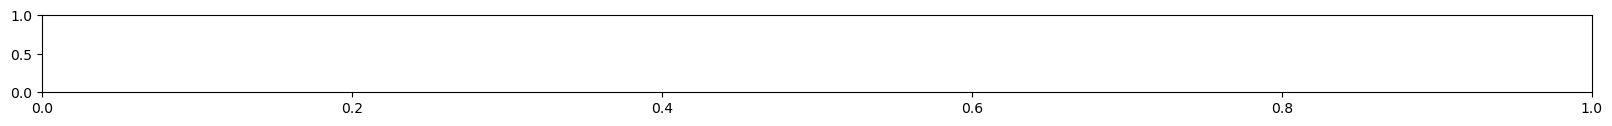

In [285]:
vec_mod = 

plt.figure(figsize=(20, 1))  # 设置热图大小
plt.imshow(start_indices, cmap=two_color_cmap, aspect='auto')  # 选择 colormap
plt.colorbar(label='Value')  # 添加颜色条
plt.xticks([])  # 设置x轴刻度
plt.yticks([])  # 隐藏y轴刻度

In [309]:
list(df_nt_start.index)

[267,
 615,
 682,
 868,
 1591,
 1955,
 2020,
 2173,
 2542,
 2627,
 2706,
 3446,
 3481,
 3508,
 3567]

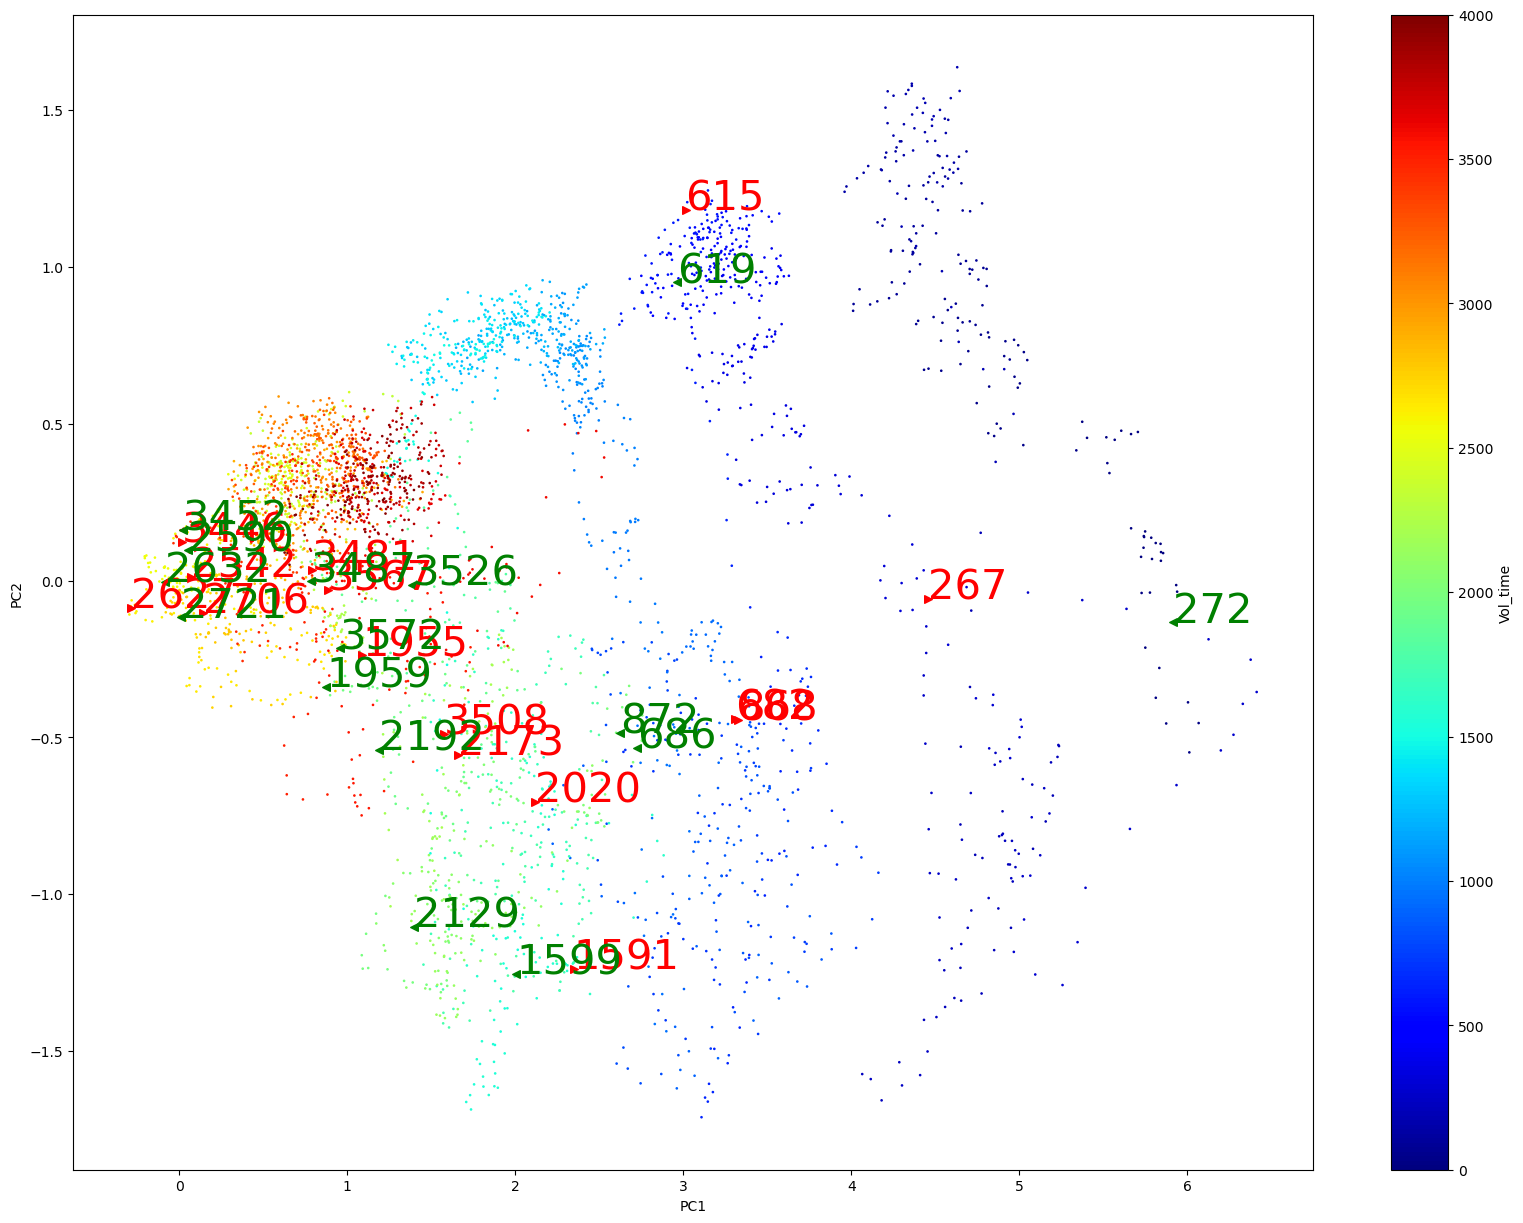

In [314]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots(figsize = (20,15))
fs = 30
label = 'Vol_time'
# 绘制散点图，并返回散点图对象
sc = ax.scatter(df_nt_mx['PC1'], df_nt_mx['PC2'], c=df_nt_mx.index,cmap='jet', s=0.8)
df_nt_start = df_nt_mx.loc[start_indices]

df_nt_end = df_nt_mx.loc[end_indices]
ls_s_idx = list(df_nt_start.index)
str_s_ls_idx = list(map(str,ls_s_idx))
for x, y, text in zip(df_nt_start['PC1'], df_nt_start['PC2'], str_s_ls_idx):
    plt.text(x, y, text, color='r', fontsize=fs)

ls_e_idx = list(df_nt_end.index)
str_e_ls_idx = list(map(str,ls_e_idx))
for x, y, text in zip(df_nt_end['PC1'], df_nt_end['PC2'], str_e_ls_idx):
    plt.text(x, y, text, color='g', fontsize=fs)    

start = ax.scatter(df_nt_start['PC1'], df_nt_start['PC2'], s=fs, marker='>', c = 'r')
end = ax.scatter(df_nt_end['PC1'], df_nt_end['PC2'], s=fs, marker='<', c = 'g')
# sm = ScalarMappable(cmap=cmp, norm=plt.Normalize(vmin=df_nt.X.max(), vmax=df_nt.X.min()))
# sm.set_array([])  # 需要设置数组，即使它是空的

# 添加颜色条，并设置标签
plt.colorbar(sc, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


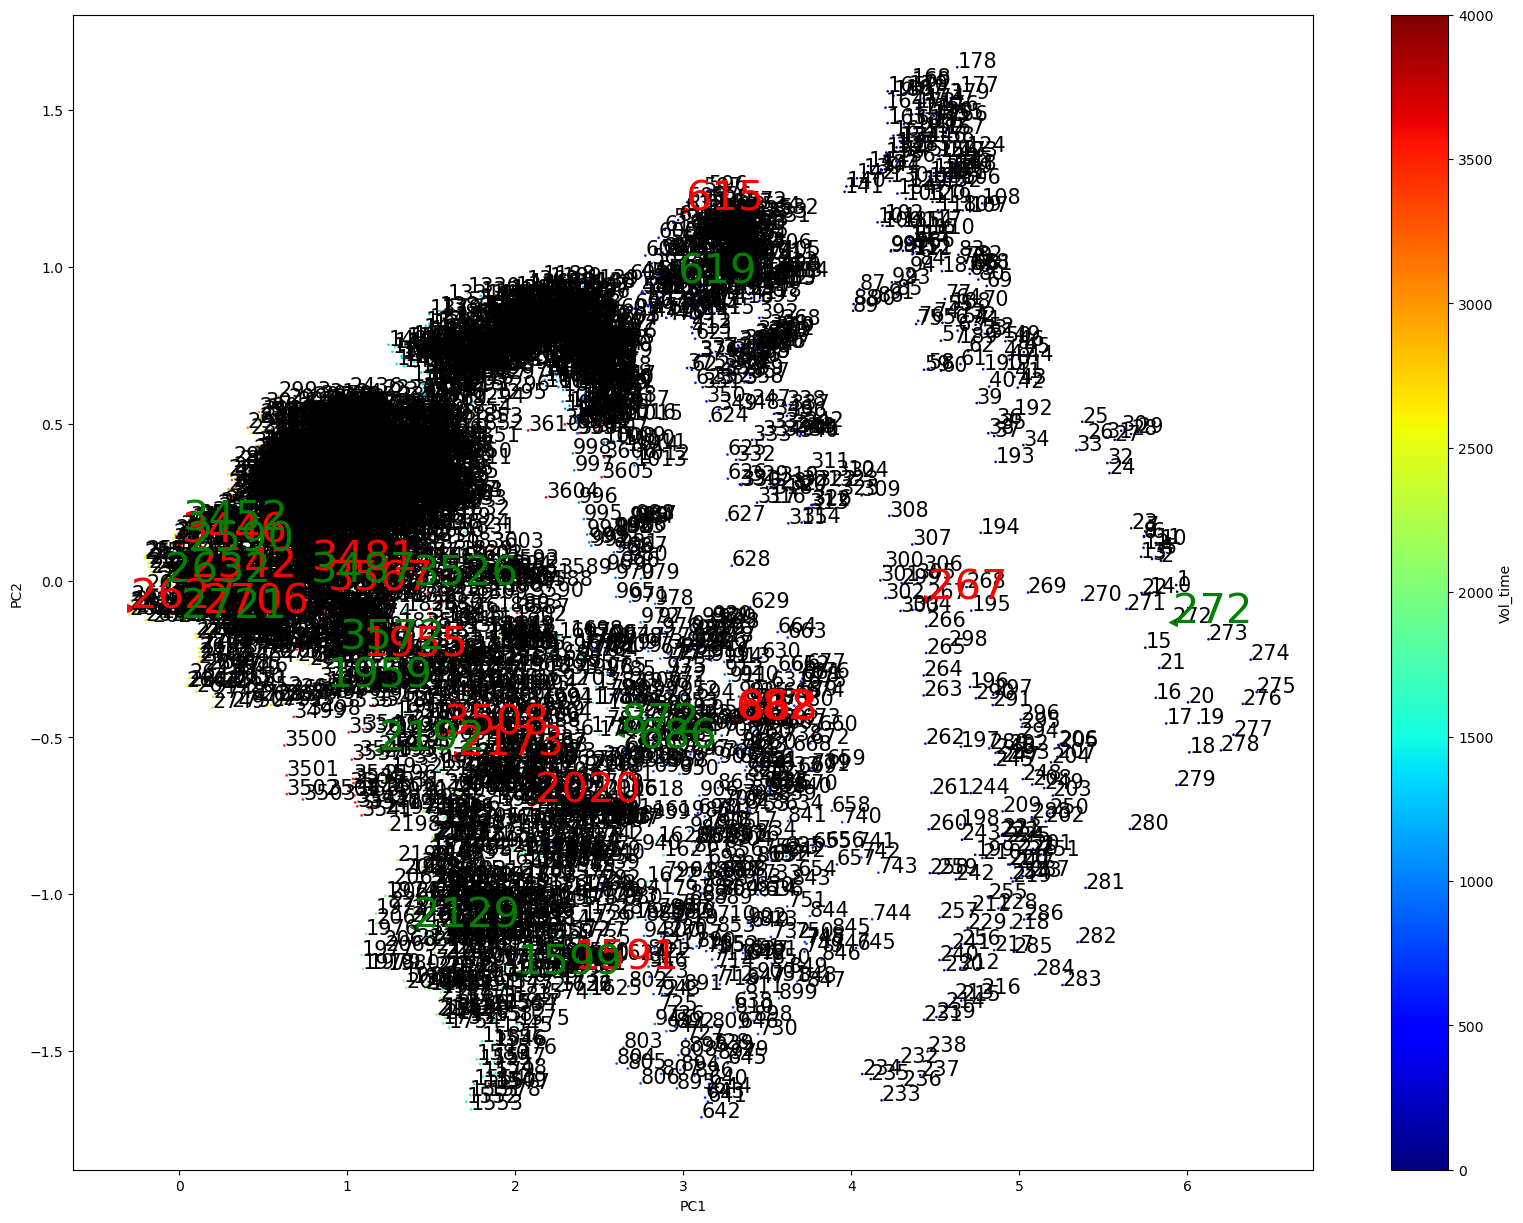

In [317]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots(figsize = (20,15))
fs = 30
label = 'Vol_time'
# 绘制散点图，并返回散点图对象
sc = ax.scatter(df_nt_mx['PC1'], df_nt_mx['PC2'], c=df_nt_mx.index,cmap='jet', s=0.8)
df_nt_start = df_nt_mx.loc[start_indices]

ls_all_idx = list(df_nt_mx.index)
str_all_ls_idx = list(map(str,ls_all_idx))

for x, y, text in zip(df_nt_mx['PC1'], df_nt_mx['PC2'], str_all_ls_idx):
    plt.text(x, y, text, color='k', fontsize=fs*0.5)

df_nt_end = df_nt_mx.loc[end_indices]
ls_s_idx = list(df_nt_start.index)
str_s_ls_idx = list(map(str,ls_s_idx))
for x, y, text in zip(df_nt_start['PC1'], df_nt_start['PC2'], str_s_ls_idx):
    plt.text(x, y, text, color='r', fontsize=fs)

ls_e_idx = list(df_nt_end.index)
str_e_ls_idx = list(map(str,ls_e_idx))
for x, y, text in zip(df_nt_end['PC1'], df_nt_end['PC2'], str_e_ls_idx):
    plt.text(x, y, text, color='g', fontsize=fs)    

start = ax.scatter(df_nt_start['PC1'], df_nt_start['PC2'], s=fs, marker='>', c = 'r')
end = ax.scatter(df_nt_end['PC1'], df_nt_end['PC2'], s=fs, marker='<', c = 'g')
# sm = ScalarMappable(cmap=cmp, norm=plt.Normalize(vmin=df_nt.X.max(), vmax=df_nt.X.min()))
# sm.set_array([])  # 需要设置数组，即使它是空的

# 添加颜色条，并设置标签
plt.colorbar(sc, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [318]:
df_nt_mx

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     5.939418 -0.035519 -0.564486 -0.473221  0.363617  0.630332 -0.363345   
1     5.933837 -0.014545 -0.530601 -0.404107  0.420933  0.641301 -0.334172   
2     5.842793  0.062948 -0.570281 -0.399030  0.427244  0.668565 -0.337127   
3     5.789826  0.068692 -0.600608 -0.462436  0.563129  0.712185 -0.395011   
4     5.843600  0.090645 -0.583706 -0.475644  0.507922  0.597416 -0.390470   
...        ...       ...       ...       ...       ...       ...       ...   
3996  0.869272  0.160286 -1.038718 -0.110340  0.137755 -0.234726  0.209921   
3997  0.747062  0.144943 -0.927591 -0.108615  0.171046 -0.301219  0.133140   
3998  0.645355  0.087816 -0.894463 -0.148163  0.186818 -0.375299  0.116372   
3999  0.627416  0.089126 -0.965273 -0.138964  0.142715 -0.286364  0.136042   
4000  0.656451  0.050333 -0.982328 -0.082628  0.121406 -0.233949  0.195623   

           PC8       PC9      PC10  ...  Vol_time  Nearest_Time  \
0     0.251058 -0.215562 -0.561879  ...    71.807        71.817   
1     0.241630 -0.272926 -0.571897  ...    72.107        72.111   
2     0.211262 -0.291213 -0.525821  ...    72.407        72.405   
3     0.159058 -0.313171 -0.590381  ...    72.711        72.701   
4     0.121275 -0.261674 -0.556108  ...    73.010        73.021   
...        ...       ...       ...  ...       ...           ...   
3996  0.107597  0.035314  0.205383  ...  1270.636      1270.641   
3997  0.181843  0.042151  0.188882  ...  1270.935      1270.935   
3998  0.145995  0.118496  0.141504  ...  1271.234      1271.229   
3999  0.157448  0.219633  0.116876  ...  1271.533      1271.523   
4000  0.108566  0.266482  0.113821  ...  1271.833      1271.843   

      Nearest_Index         X          Y  speed  agl_speed  CTX_left  Event  \
0                 1       NaN        NaN    NaN        NaN       NaN      0   
1                12       NaN        NaN    NaN        NaN       NaN      0   
2                23       NaN        NaN    NaN        NaN       NaN      0   
3                34       NaN        NaN    NaN        NaN       NaN      0   
4                46       NaN        NaN    NaN        0.0       NaN      0   
...             ...       ...        ...    ...        ...       ...    ...   
3996          44842  0.002773  19.658964    NaN        0.0       NaN      0   
3997          44853       NaN        NaN    NaN        0.0       NaN      0   
3998          44864       NaN        NaN    NaN        NaN       NaN      0   
3999          44875       NaN        NaN    NaN        NaN       NaN      0   
4000          44887       NaN        NaN    NaN        NaN       NaN      0   

      Reorientation  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
3996              0  
3997              0  
3998              0  
3999              0  
4000              0  

[4001 rows x 125 columns]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots(figsize = (20,15))
fs = 30
label = 'Vol_time'
# 绘制散点图，并返回散点图对象
sc = ax.scatter(df_nt_mx['PC1'], df_nt_mx['PC2'], c=df_nt_mx.index,cmap='jet', s=0.8)
df_nt_start = df_nt_mx.loc[start_indices]

ls_all_idx = list(df_nt_mx.index)
str_all_ls_idx = list(map(str,ls_all_idx))

for x, y, text in zip(df_nt_mx['PC1'], df_nt_mx['PC2'], str_all_ls_idx):
    plt.text(x, y, text, color='k', fontsize=fs*0.5)

df_nt_end = df_nt_mx.loc[end_indices]
ls_s_idx = list(df_nt_start.index)
str_s_ls_idx = list(map(str,ls_s_idx))
for x, y, text in zip(df_nt_start['PC1'], df_nt_start['PC2'], str_s_ls_idx):
    plt.text(x, y, text, color='r', fontsize=fs)

ls_e_idx = list(df_nt_end.index)
str_e_ls_idx = list(map(str,ls_e_idx))
# for x, y, text in zip(df_nt_end['PC1'], df_nt_end['PC2'], str_e_ls_idx):
#     plt.text(x, y, text, color='g', fontsize=fs)    

start = ax.scatter(df_nt_start['PC1'], df_nt_start['PC2'], s=fs, marker='>', c = 'r')
end = ax.scatter(df_nt_end['PC1'], df_nt_end['PC2'], s=fs, marker='<', c = 'g')
# sm = ScalarMappable(cmap=cmp, norm=plt.Normalize(vmin=df_nt.X.max(), vmax=df_nt.X.min()))
# sm.set_array([])  # 需要设置数组，即使它是空的

# 添加颜色条，并设置标签
plt.colorbar(sc, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [ ]:

fig, ax = plt.subplots()
label = 'Vol_time'
# 绘制散点图，并返回散点图对象
sc = ax.scatter(df_nt_mx['PC1'], df_nt_mx['PC2'], c=df_nt_mx[label],cmap='Reds', s=0.8)
df_nt_start = df_nt_mx.loc[start_indices]
df_nt_end = df_nt_mx.loc[end_indices]
start = ax.scatter(df_nt_start['PC1'], df_nt_start['PC2'], s=10, marker='*', c = 'b')
end = ax.scatter(df_nt_end['PC1'], df_nt_end['PC2'], s=10, marker='*', c = 'g')
# sm = ScalarMappable(cmap=cmp, norm=plt.Normalize(vmin=df_nt.X.max(), vmax=df_nt.X.min()))
# sm.set_array([])  # 需要设置数组，即使它是空的

# 添加颜色条，并设置标签
plt.colorbar(sc, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

(0.0, 4001.0)

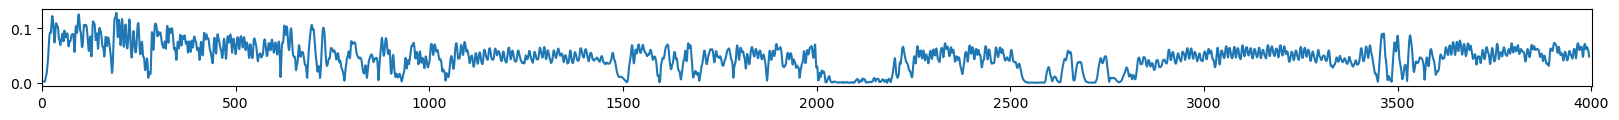

In [281]:
plt.figure(figsize=(20, 1))  # 设置热图大小
plt.plot(df_nt.speed)
plt.xlim(0,4001)

In [220]:
df_nt.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'Vol_time', 'Nearest_Time', 'Nearest_Index', 'X', 'Y', 'speed',
       'agl_speed', 'CTX_left', 'Event', 'Reorientation'],
      dtype='object', length=125)

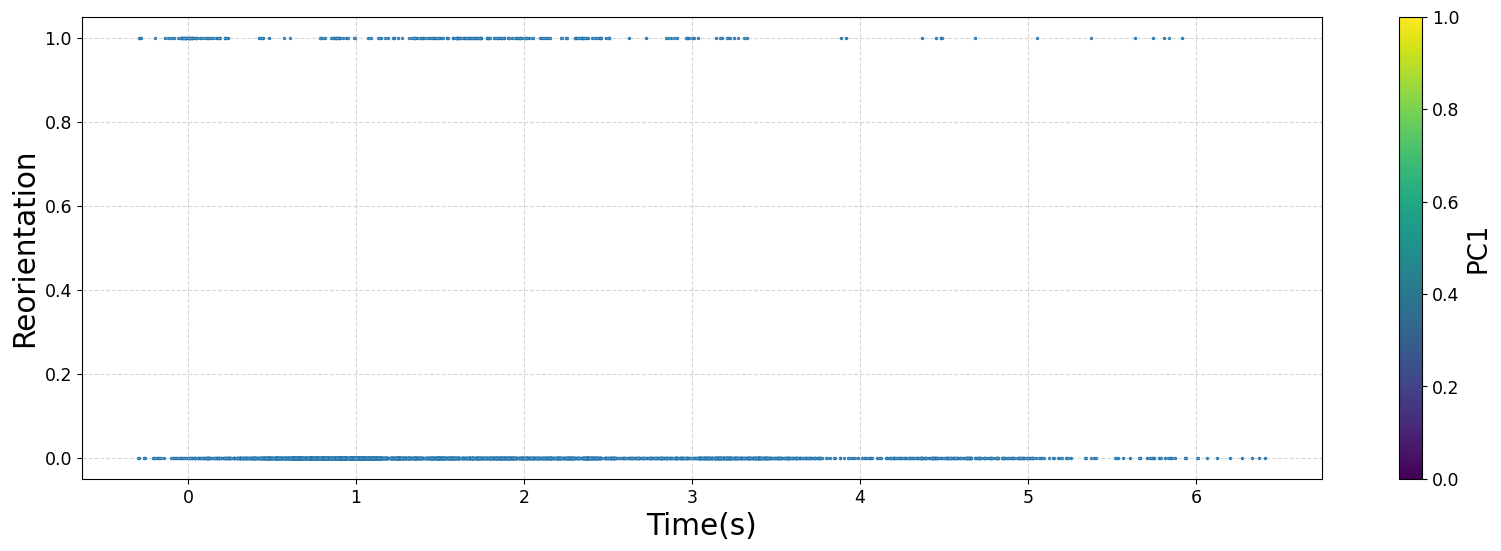

In [221]:

nt_col ='Reorientation' 
x_col = 'PC1'
x_label = x_col
fs = 25

# 可视化 PC1，颜色根据归一化 'X' 值设置
plt.figure(figsize=(20, 6), dpi=100)
scatter = plt.scatter(df_nt[x_col], df_nt[nt_col], s=2)
bar = plt.colorbar(scatter)  # 添加 colorbar 和标签
bar.ax.tick_params(labelsize=fs*0.5)
bar.set_label(label=x_label, fontsize=fs*0.75)
# plt.title(f'Visualization of {nt_col} over {x_col}', fontsize=fs, pad = 20)
plt.xticks(fontsize=fs*0.5)
plt.yticks(fontsize=fs*0.5)
plt.xlabel('Time(s)', fontsize=fs*0.85)
plt.ylabel(nt_col, fontsize=fs*0.85)
plt.grid(True, linestyle='dashed', alpha=0.5)
plt.show()

In [181]:
import matplotlib.colors as mcolors
# PC可视化
# pos_col = 'CTX_left'
nt_col = 'CTX_left'
x_label = pos_col
fs = 25
start = 3000
end=4000
df_nt_t = df_nt.loc[start:end,:]
# 可视化 PC1，颜色根据归一化 'X' 值设置
plt.figure(figsize=(15, 10), dpi=1000)
scatter = plt.scatter(df_nt_t.X, df_nt_t.Y,c = df_nt_t[nt_col], cmap='jet', s=2)
bar = plt.colorbar(scatter)  # 添加 colorbar 和标签
bar.ax.tick_params(labelsize=fs*0.5)
bar.set_label(label=nt_col, fontsize=fs*0.75)
plt.title(f'Trajectory label with{nt_col}from{start}to{end} ', fontsize=fs, pad = 20)
plt.xticks(fontsize=fs*0.5)
plt.yticks(fontsize=fs*0.5)
plt.xlabel('X(mm)', fontsize=fs*0.85)
ax = plt.gca()
ax.set_aspect(1)
plt.ylabel('Y(mm)', fontsize=fs*0.85)
plt.grid(True, linestyle='dashed', alpha=0.5)
plt.show()

In [ ]:
df_nt_mx

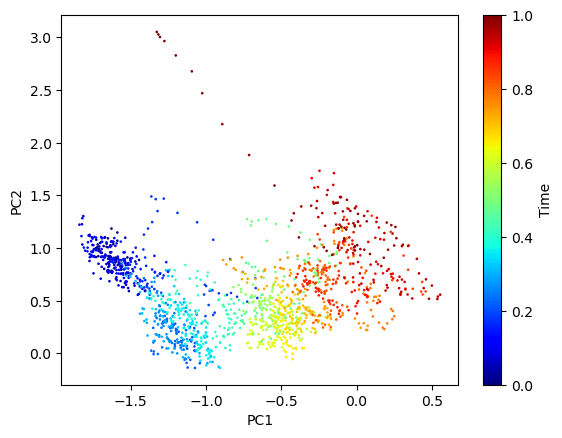

In [200]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable
# colors = np.linspace(0, 1, 4001)
# cmap = ListedColormap(['red', 'blue'])
cmp=plt.get_cmap('jet') 
lin=np.linspace(0, 1, calcium_intensity.shape[1])
colors=cmp(lin)
t=calcium_intensity.shape[1]

fig, ax = plt.subplots()

# 绘制散点图，并返回散点图对象
sc = ax.scatter(xn[:t, 0], xn[:t, 1], c=colors[:t], s=0.8)
sm = ScalarMappable(cmap=cmp, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])  # 需要设置数组，即使它是空的

# 添加颜色条，并设置标签
cbar = fig.colorbar(sm, ax=ax, label='Time')
plt.xlabel('PC1')
plt.ylabel('PC2')
# cbar.set_ticks(np.linspace(0, 1, 20))  # 设置颜色条的刻度
# cbar.set_ticklabels(np.linspace(0, 1, 20)) 
# plt.colorbar(ax.collections[0],label='Time')
# plt.savefig(f'{save_p}/2d_pca.png')
plt.show()


Text(0, 0.5, 'PC1')

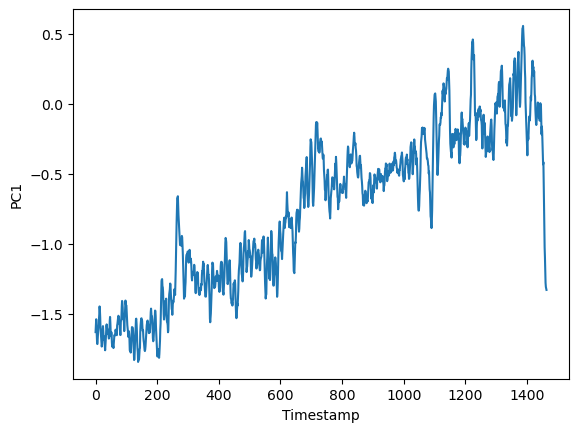

In [205]:
plt.plot(xn[:t,0])
plt.xlabel('Timestamp')
plt.ylabel('PC1')

Text(0.5, 0, 'PC3')

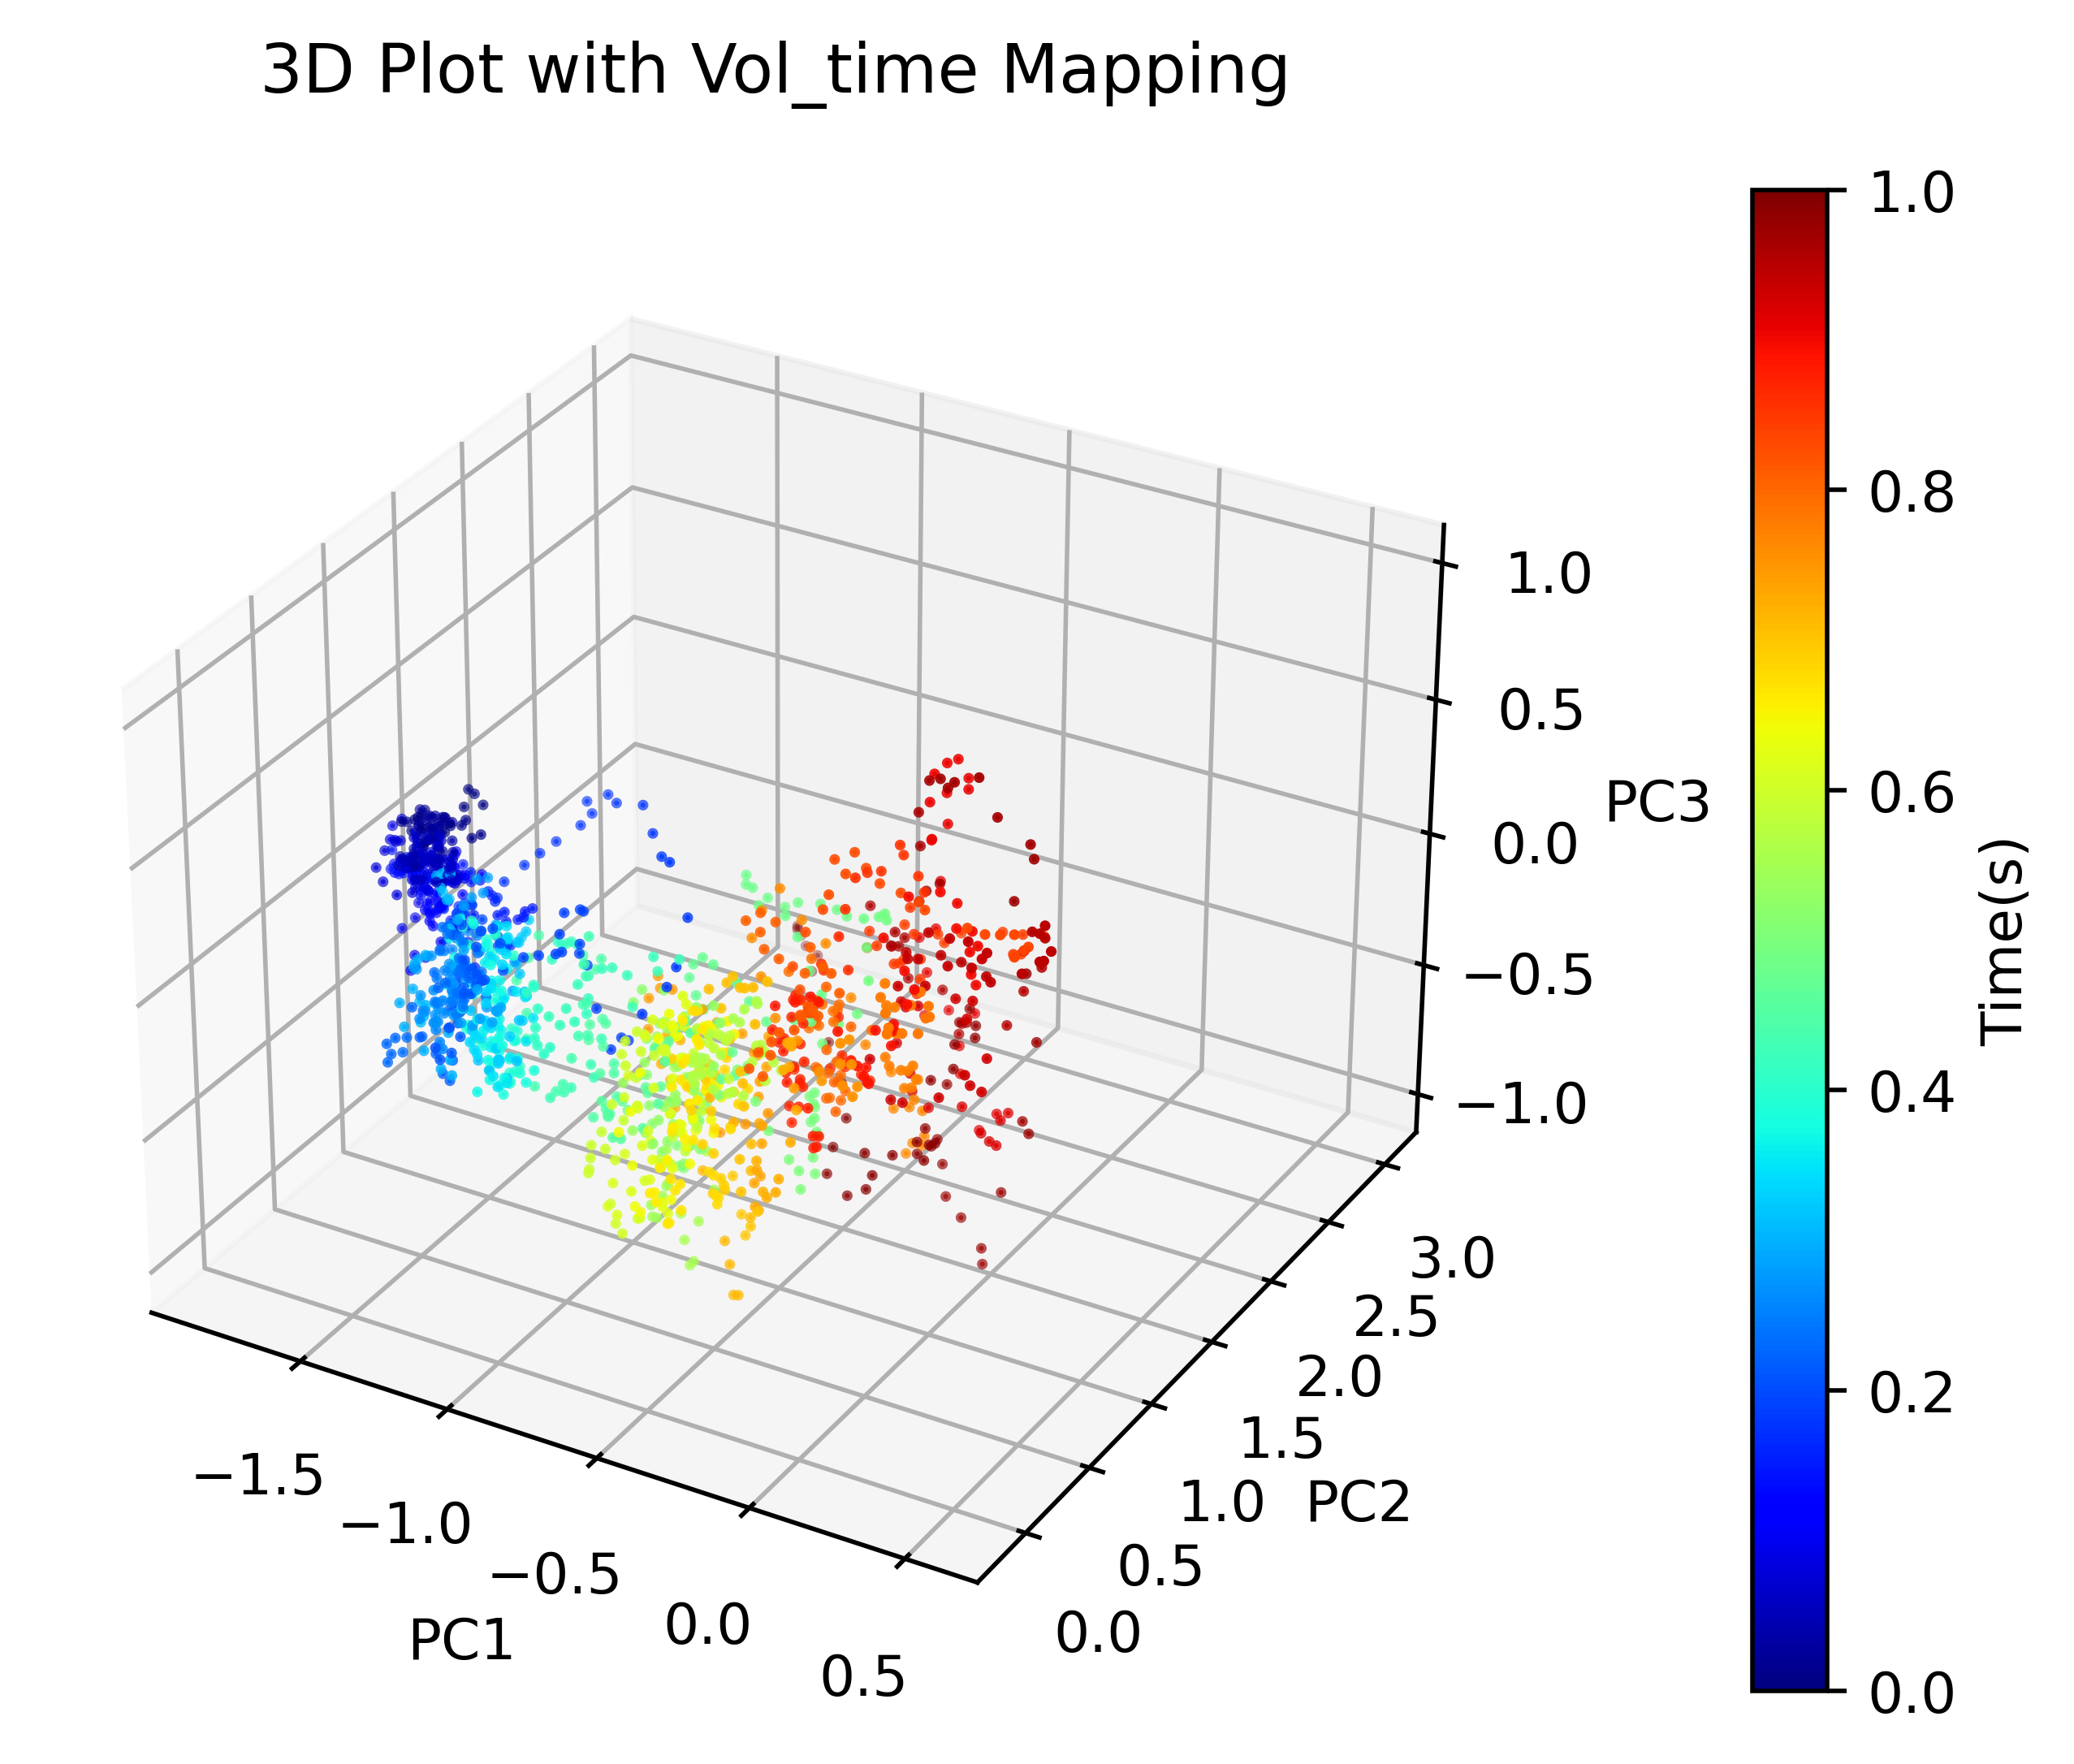

In [208]:
from mpl_toolkits.mplot3d import Axes3D

col = 'Vol_time'
x = xn[:t, 0]
y = xn[:t, 1]
z = xn[:t, 2]
color_values = lin[:t]  # 获取对应的颜色值

# 绘图
fig = plt.figure(dpi=500)
ax = fig.add_subplot(projection='3d')

# 使用 scatter 绘制带颜色的 3D 点
scatter = ax.scatter(x, y, z, c=color_values, cmap='jet', marker='o', s=0.8)

# 添加 colorbar
cbar = plt.colorbar(scatter, ax=ax, pad = 0.12)
cbar.set_label('Time(s)')

# 设置标题和标签
ax.set_title(f'3D Plot with {col} Mapping', pad=20)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')